In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
import seaborn as sns

In [6]:
# 데이터 불러오기
data = pd.read_csv('C:/Users/sblim/edu-ai/project/LOCA/EEG DATA 뇌파/EEG_data.csv')

In [7]:
data

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,1.0,0.0


In [8]:
data[(data['Attention']< 43.0) & (data['user-definedlabeln']==0.0)]

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
1,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
7,0.0,0.0,40.0,61.0,-2.0,161000.0,12100.0,1960.0,809.0,1280.0,3190.0,3270.0,2520.0,0.0,0.0
23,0.0,0.0,41.0,50.0,119.0,613000.0,758000.0,246000.0,132000.0,26600.0,83800.0,94500.0,56100.0,0.0,0.0
24,0.0,0.0,27.0,37.0,37.0,603000.0,47300.0,3220.0,2810.0,1860.0,7210.0,7880.0,1520.0,0.0,0.0
25,0.0,0.0,29.0,50.0,102.0,235000.0,183000.0,54000.0,31300.0,19600.0,67100.0,29400.0,21400.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12789,9.0,9.0,23.0,34.0,-643.0,596000.0,276000.0,34500.0,20500.0,5270.0,24700.0,17900.0,1080.0,1.0,0.0
12790,9.0,9.0,35.0,44.0,242.0,1380000.0,47800.0,39900.0,20500.0,4560.0,33200.0,31300.0,2760.0,1.0,0.0
12791,9.0,9.0,35.0,44.0,3.0,659000.0,37000.0,15900.0,14500.0,4990.0,8290.0,5110.0,1420.0,1.0,0.0
12792,9.0,9.0,30.0,48.0,-37.0,641000.0,118000.0,48300.0,12800.0,13500.0,20300.0,39300.0,1050.0,1.0,0.0


In [9]:
# SubjectID와 각각의 VideoID별로 각 feature에 해당하는 데이터들을 저장

# 결과를 저장할 딕셔너리
raw_data_dict = {}  

subject_ids = data['SubjectID'].unique()
video_ids = data['VideoID'].unique()

for subject_id in subject_ids:
    raw_data_dict[subject_id] = {}
    for video_id in video_ids:
        # SubjectID와 VideoID에 해당하는 데이터 필터링
        filtered_data = data[(data['SubjectID'] == subject_id) & (data['VideoID'] == video_id)]
        # 필요한 값들을 딕셔너리로 저장
        attention_values = filtered_data['Attention'].tolist()
        mediation_values = filtered_data['Mediation'].tolist()
        raw_data = filtered_data['Raw'].tolist()
        delta_values = filtered_data['Delta'].tolist()
        theta_values = filtered_data['Theta'].tolist()
        alpha1_values = filtered_data['Alpha1'].tolist()
        alpha2_values = filtered_data['Alpha2'].tolist()
        beta1_values = filtered_data['Beta1'].tolist()
        beta2_values = filtered_data['Beta2'].tolist()
        gamma1_values = filtered_data['Gamma1'].tolist()
        gamma2_values = filtered_data['Gamma2'].tolist()
        predefinedlabel = filtered_data['predefinedlabel'].tolist()
        user_definedlabelIn = filtered_data['user-definedlabeln'].tolist()

        raw_data_dict[subject_id][video_id] = {
            'Attention' : attention_values,
            'Mediation' : mediation_values,
            'Raw': raw_data,
            'Delta': delta_values,
            'Theta': theta_values,
            'Alpha1': alpha1_values,
            'Alpha2': alpha2_values,
            'Beta1': beta1_values,
            'Beta2': beta2_values,
            'Gamma1': gamma1_values,
            'Gamma2': gamma2_values,
            'Predefinedlabel' : predefinedlabel,
            'User_definedlabelIn' : user_definedlabelIn
        }

In [10]:
#### SubjectID = 0을 기준

In [11]:
lst_label_0 = [0, 3, 4, 7, 9]
lst_label_1 = [1, 2, 5, 6, 8]

## label 0 : 혼동되지않음(집중0), label 1 : 혼동됨(집중x)
## 세타와 하위 알파 대역에 대해 혼란과의 관계에 초점을 맞추고 있다?
## https://www.researchgate.net/publication/340888401_Classification_of_Confusion_Level_Using_EEG_Data_and_Artificial_Neural_Networks

In [13]:
EEG_RAW_0 = raw_data_dict[0][7]['Raw']
EEG_ATT_0 = raw_data_dict[0][7]['Attention']
EEG_LABEL_0 = list(set(raw_data_dict[0][3]['User_definedlabelIn']))

EEG_RAW_1 = raw_data_dict[0][8]['Raw']
EEG_ATT_1 = raw_data_dict[0][8]['Attention']
EEG_LABEL_1 = list(set(raw_data_dict[0][2]['User_definedlabelIn']))

In [14]:
len(EEG_RAW_0)

112

In [9]:
sampling_rate = 101

## label 0 ##
##### 0.5초 샘플링의 경우 #####
n00 = len(EEG_RAW_0)
fft_result00 = np.fft.fft(EEG_RAW_0)
frequency00 = np.fft.fftfreq(n00, 1/sampling_rate)
    
##### 1초 샘플링의 경우 #####
n01 = len(EEG_RAW_0[0::2])
fft_result01 = np.fft.fft(EEG_RAW_0[0::2])
frequency01 = np.fft.fftfreq(n01, 1/sampling_rate)


## label 1 ##
##### 0.5초 샘플링의 경우 #####
n10 = len(EEG_RAW_1)
fft_result10 = np.fft.fft(EEG_RAW_1)
frequency10 = np.fft.fftfreq(n10, 1/sampling_rate)
    
##### 1초 샘플링의 경우 #####
n11 = len(EEG_RAW_1[0::2])
fft_result11 = np.fft.fft(EEG_RAW_1[0::2])
frequency11 = np.fft.fftfreq(n11, 1/sampling_rate)

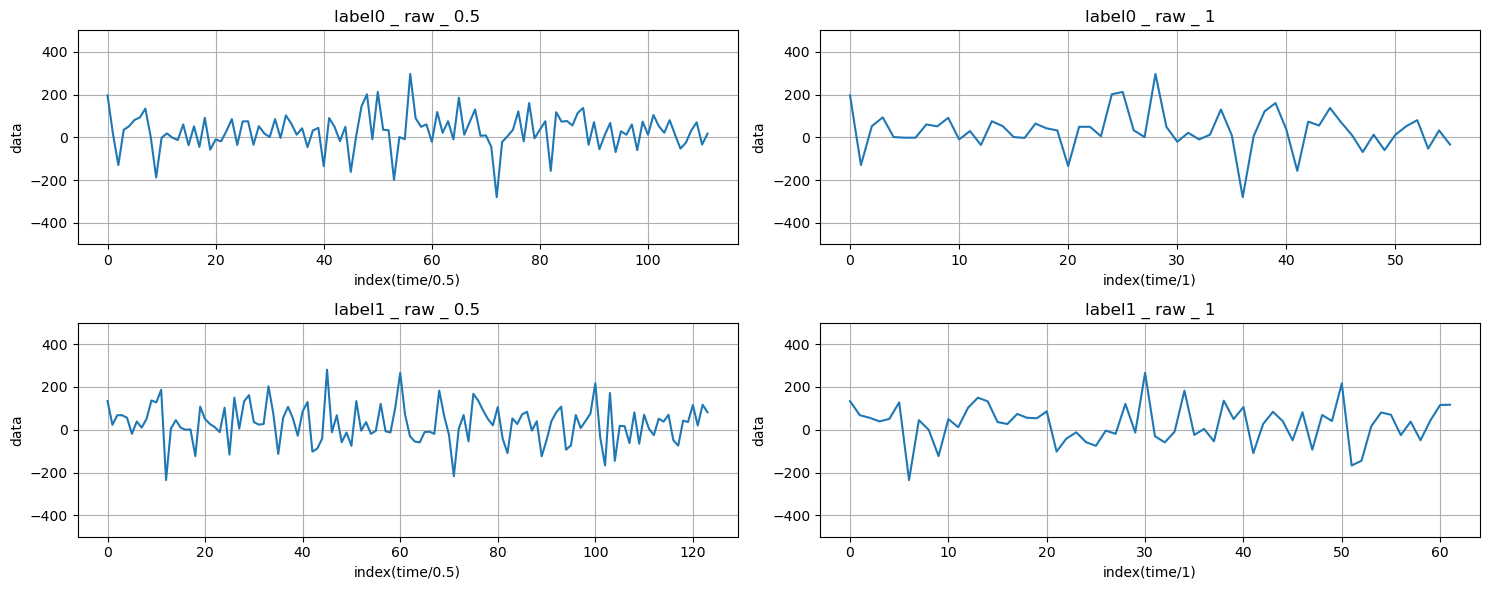

In [10]:
### 원본 raw 데이터 비교 ###
plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.plot(EEG_RAW_0)
plt.xlabel('index(time/0.5)')
plt.ylabel('data')
plt.ylim(-500, 500)
plt.title('label0 _ raw _ 0.5')
plt.grid()

plt.subplot(222)
plt.plot(EEG_RAW_0[0::2])
plt.xlabel('index(time/1)')
plt.ylabel('data')
plt.ylim(-500, 500)
plt.title('label0 _ raw _ 1')
plt.grid()

plt.subplot(223)
plt.plot(EEG_RAW_1)
plt.xlabel('index(time/0.5)')
plt.ylabel('data')
plt.ylim(-500, 500)
plt.title('label1 _ raw _ 0.5')
plt.grid()

plt.subplot(224)
plt.plot(EEG_RAW_1[0::2])
plt.xlabel('index(time/1)')
plt.ylabel('data')
plt.ylim(-500, 500)
plt.title('label1 _ raw _ 1')
plt.grid()

plt.tight_layout()
plt.show()

In [11]:
## label = 0, 0.5초
# 주파수 대역 설정
delta_freq_range00 = (0.5 <= frequency00) & (frequency00 <= 4.0)
theta_freq_range00 = (4.0 < frequency00) & (frequency00 <= 8.0)
alpha1_freq_range00 = (8.0 < frequency00) & (frequency00 <= 10.0)
alpha2_freq_range00 = (10.0 < frequency00) & (frequency00 <= 12.0)
beta1_freq_range00 = (12.0 < frequency00) & (frequency00 <= 18.0)
beta2_freq_range00 = (18.0 < frequency00) & (frequency00 <= 30.0)
gamma1_freq_range00 = (30.0 < frequency00) & (frequency00 <= 40.0)
gamma2_freq_range00 = (40.0 < frequency00) & (frequency00 <= 50.0)

# 주파수 대역별 주파수 성분 추출
delta_data00 = np.abs(fft_result00[delta_freq_range00])
theta_data00 = np.abs(fft_result00[theta_freq_range00])
alpha1_data00 = np.abs(fft_result00[alpha1_freq_range00])
alpha2_data00 = np.abs(fft_result00[alpha2_freq_range00])
beta1_data00 = np.abs(fft_result00[beta1_freq_range00])
beta2_data00 = np.abs(fft_result00[beta2_freq_range00])
gamma1_data00 = np.abs(fft_result00[gamma1_freq_range00])
gamma2_data00 = np.abs(fft_result00[gamma2_freq_range00])


## label = 1, 0.5초
# 주파수 대역 설정
delta_freq_range10 = (0.5 <= frequency10) & (frequency10 <= 4.0)
theta_freq_range10 = (4.0 < frequency10) & (frequency10 <= 8.0)
alpha1_freq_range10 = (8.0 < frequency10) & (frequency10 <= 10.0)
alpha2_freq_range10 = (10.0 < frequency10) & (frequency10 <= 12.0)
beta1_freq_range10 = (12.0 < frequency10) & (frequency10 <= 18.0)
beta2_freq_range10 = (18.0 < frequency10) & (frequency10 <= 30.0)
gamma1_freq_range10 = (30.0 < frequency10) & (frequency10 <= 40.0)
gamma2_freq_range10 = (40.0 < frequency10) & (frequency10 <= 50.0)

# 주파수 대역별 주파수 성분 추출
delta_data10 = np.abs(fft_result10[delta_freq_range10])
theta_data10 = np.abs(fft_result10[theta_freq_range10])
alpha1_data10 = np.abs(fft_result10[alpha1_freq_range10])
alpha2_data10 = np.abs(fft_result10[alpha2_freq_range10])
beta1_data10 = np.abs(fft_result10[beta1_freq_range10])
beta2_data10 = np.abs(fft_result10[beta2_freq_range10])
gamma1_data10 = np.abs(fft_result10[gamma1_freq_range10])
gamma2_data10 = np.abs(fft_result10[gamma2_freq_range10])

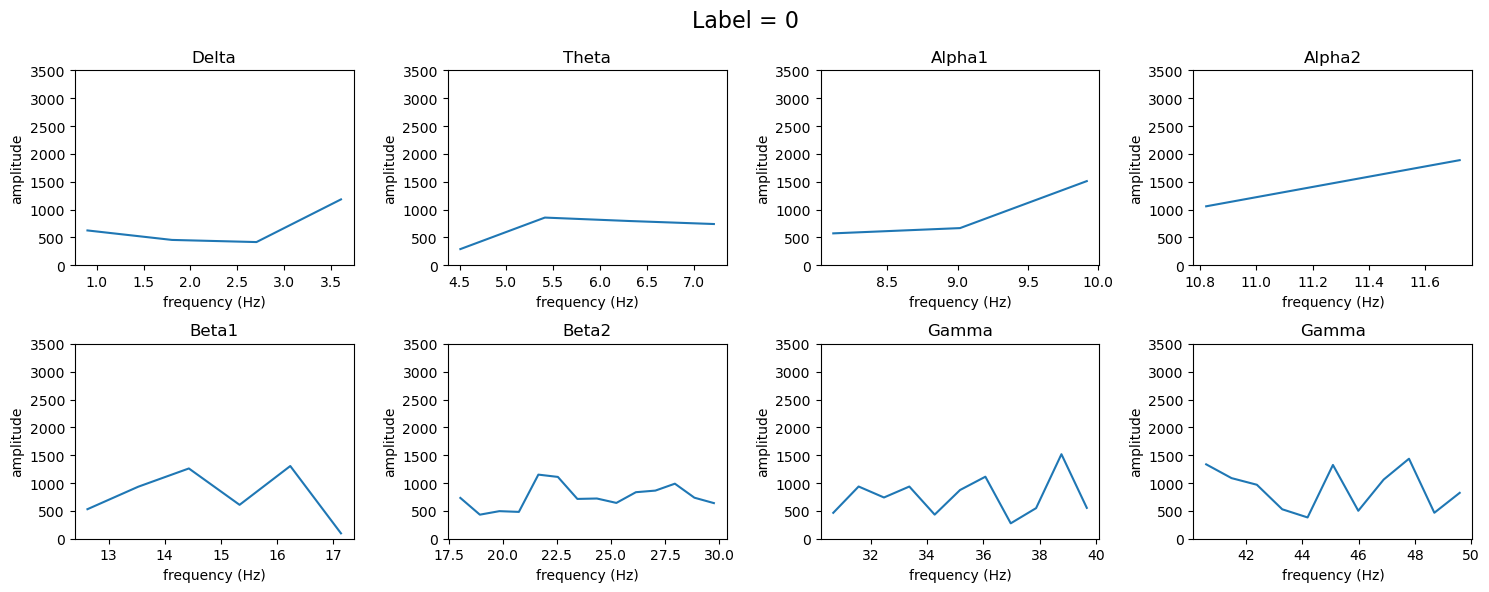

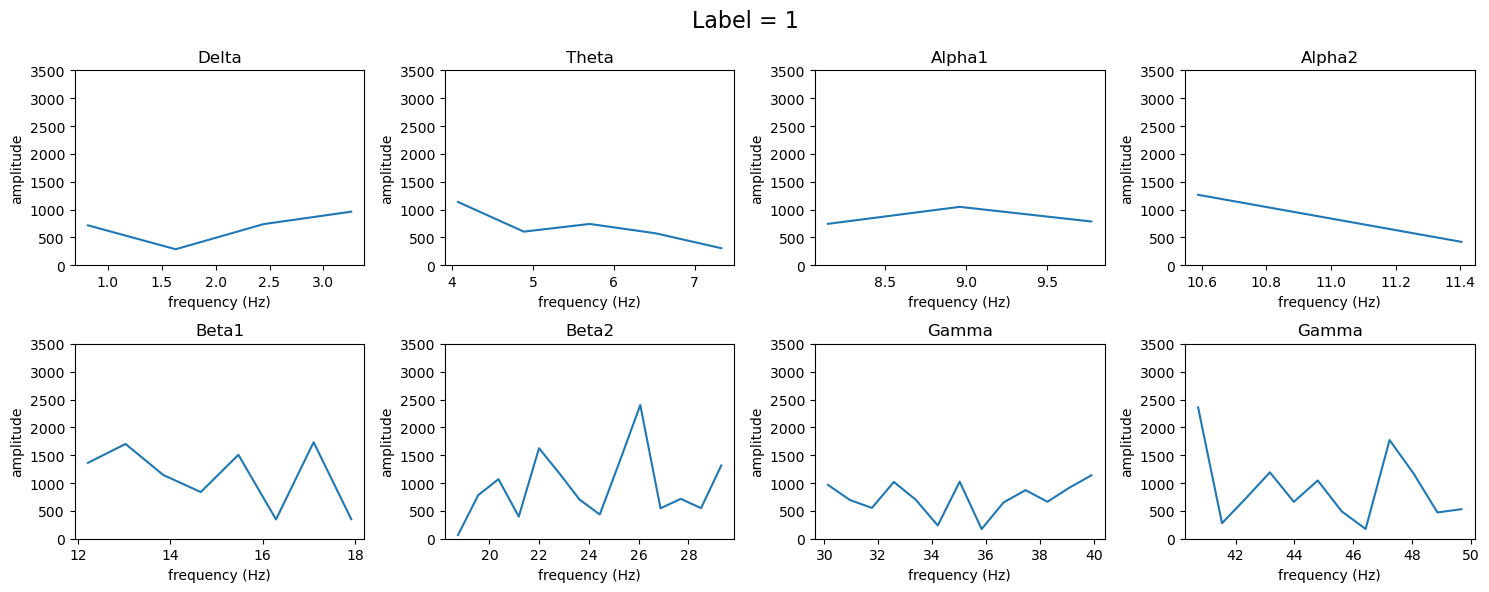

In [12]:
## label = 0, 0.5초
# 주파수 성분 시각화
plt.figure(figsize=(15, 6))

plt.suptitle('Label = 0', fontsize=16)

plt.subplot(2, 4, 1)
plt.plot(frequency00[delta_freq_range00], delta_data00)
plt.title('Delta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 2)
plt.plot(frequency00[theta_freq_range00], theta_data00)
plt.title('Theta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 3)
plt.plot(frequency00[alpha1_freq_range00], alpha1_data00)
plt.title('Alpha1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 4)
plt.plot(frequency00[alpha2_freq_range00], alpha2_data00)
plt.title('Alpha2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 5)
plt.plot(frequency00[beta1_freq_range00], beta1_data00)
plt.title('Beta1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 6)
plt.plot(frequency00[beta2_freq_range00], beta2_data00)
plt.title('Beta2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 7)
plt.plot(frequency00[gamma1_freq_range00], gamma1_data00)
plt.title('Gamma')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 8)
plt.plot(frequency00[gamma2_freq_range00], gamma2_data00)
plt.title('Gamma')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.tight_layout()
plt.show()

## label = 1, 0.5초
plt.figure(figsize=(15, 6))

plt.suptitle('Label = 1', fontsize=16)

plt.subplot(2, 4, 1)
plt.plot(frequency10[delta_freq_range10], delta_data10)
plt.title('Delta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 2)
plt.plot(frequency10[theta_freq_range10], theta_data10)
plt.title('Theta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 3)
plt.plot(frequency10[alpha1_freq_range10], alpha1_data10)
plt.title('Alpha1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 4)
plt.plot(frequency10[alpha2_freq_range10], alpha2_data10)
plt.title('Alpha2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 5)
plt.plot(frequency10[beta1_freq_range10], beta1_data10)
plt.title('Beta1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 6)
plt.plot(frequency10[beta2_freq_range10], beta2_data10)
plt.title('Beta2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 7)
plt.plot(frequency10[gamma1_freq_range10], gamma1_data10)
plt.title('Gamma')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 8)
plt.plot(frequency10[gamma2_freq_range10], gamma2_data10)
plt.title('Gamma')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)


plt.tight_layout()
plt.show()